In [36]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [37]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\UP2store/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-2-8 Python-3.11.5 torch-2.2.0+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [38]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [39]:
import uuid   
import os
import time

In [40]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['pound', 'half-pound']
number_imgs = 110

In [41]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path = 'yolov5/runs/train/exp15/weights/last.pt', force_reload = True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\UP2store/.cache\torch\hub\master.zip
YOLOv5  2024-2-8 Python-3.11.5 torch-2.2.0+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [42]:
import cv2
img = "C:\\Users\\UP2store\\yolov5\\data\\images\\IMG20240206231006.jpg"
imgg = cv2.imread(img)

In [43]:
results = model(imgg)

In [44]:
results

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 4000x3000 2 half-pounds
Speed: 15.4ms pre-process, 203.2ms inference, 0.0ms NMS per image at shape (1, 3, 640, 480)

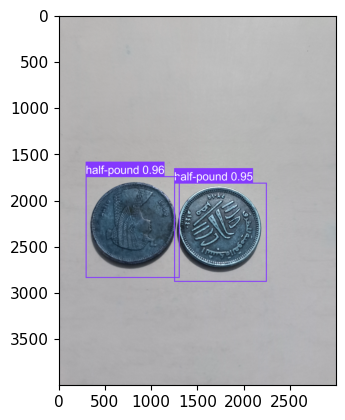

In [45]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [35]:
import cv2
import numpy as np
import cv2

img = "C:\\Users\\UP2store\\yolov5\\data\\images\\IMG20240206231006.jpg"
imgg = cv2.imread(img)
results = model(imgg)

image_data = np.squeeze(results.render())
cv2.imshow('mmm', image_data)
cv2.waitKey(0)  # Wait for any key press
cv2.destroyAllWindows()

In [46]:
cap = cv2.VideoCapture('C:\\Users\\UP2store\\yolov5\\VID20240208174929.mp4')
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'shape'